<a href="https://colab.research.google.com/github/brayanb1701/Lab-Avanzado-1/blob/main/Lab_FHN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

#import pandas as pd

# Load the data from the Excel file
excel_data = pd.read_excel('lab fhn.xlsx')

# Display the first few rows of the dataframe to understand its structure
excel_data.head()


,V,I
0,0.0,-0.04
1,4.9,-0.03
2,10.2,0.06
3,13.9,0.29
4,15.1,0.30


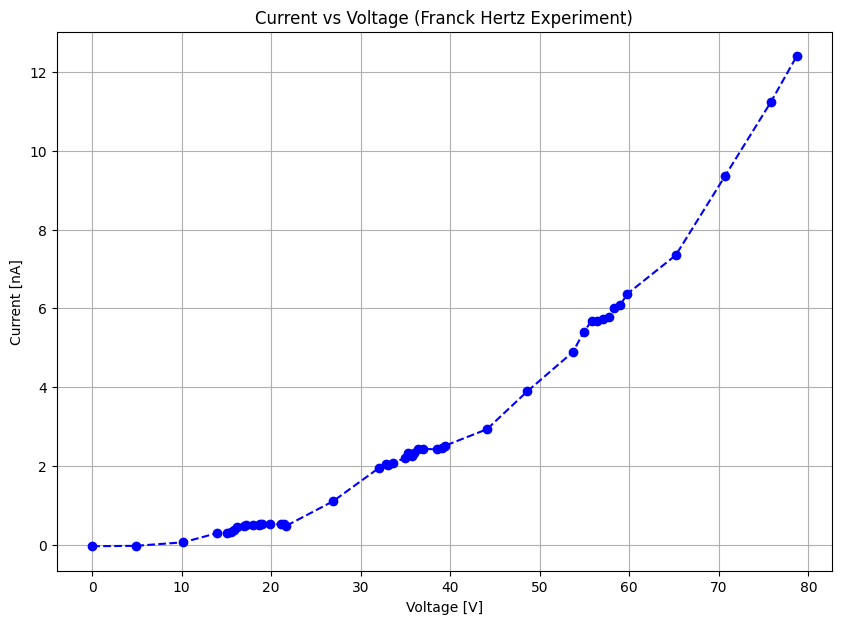

In [4]:
# Plotting Current (I) vs Voltage (V)
plt.figure(figsize=(10, 7))
plt.plot(excel_data['V'], excel_data['I'], marker='o', linestyle='--', color='blue')
plt.title('Current vs Voltage (Franck Hertz Experiment)')
plt.xlabel('Voltage [V]')
plt.ylabel('Current [nA]')
plt.grid(True)
plt.show()

In [30]:
# Convert commas to dots for decimal places and parse the numeric values
txt_data = pd.read_csv(
    'curvaoriginalfinal.txt',
    sep="\t",
    header=None,
    skiprows=5,  # Skip the initial rows that don't contain the data we need
    decimal=',', # Set the decimal to comma to handle European decimal format
)

# Assign proper column names based on the information given
txt_data.columns = ['Time_s', 'Tension_U_A1_V', 'Tension_U_B1_V', 'Current_I_A_nA', 'Acceleration_U_B_V']


# Display the first few rows to confirm the changes
txt_data.head()

,Time_s,Tension_U_A1_V,Tension_U_B1_V,Current_I_A_nA,Acceleration_U_B_V
0,0.000,-0.045,0.005,-0.045,0.05
1,0.101,-0.045,0.005,-0.045,0.05
2,0.200,-0.045,0.005,-0.045,0.05
3,0.300,-0.045,0.000,-0.045,0.00
4,0.399,-0.045,0.005,-0.045,0.05


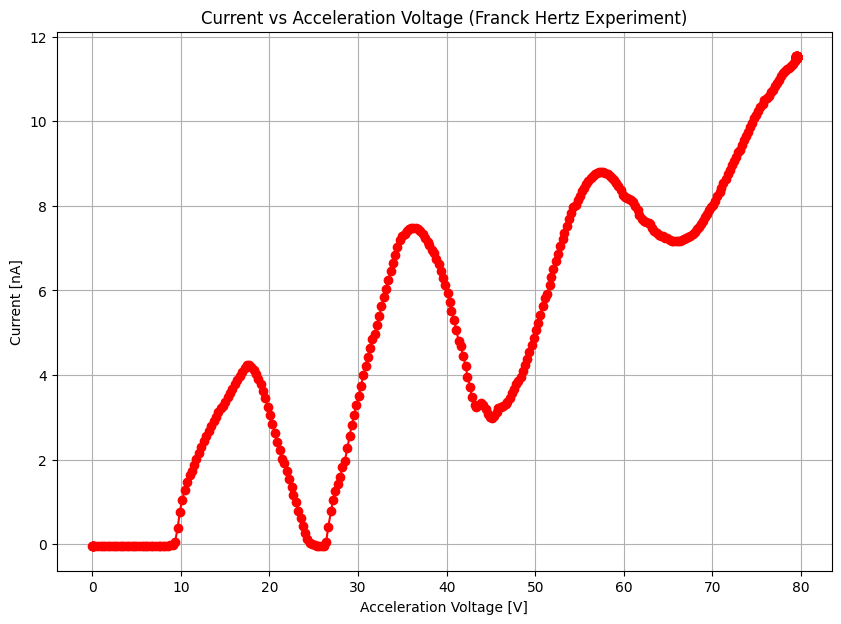

In [10]:
# Plotting Current (I_A) vs Acceleration Voltage (U_B)
plt.figure(figsize=(10, 7))
plt.plot(txt_data['Acceleration_U_B_V'], txt_data['Current_I_A_nA'], marker='o', linestyle='-', color='red')
plt.title('Current vs Acceleration Voltage (Franck Hertz Experiment)')
plt.xlabel('Acceleration Voltage [V]')
plt.ylabel('Current [nA]')
plt.grid(True)
plt.show()

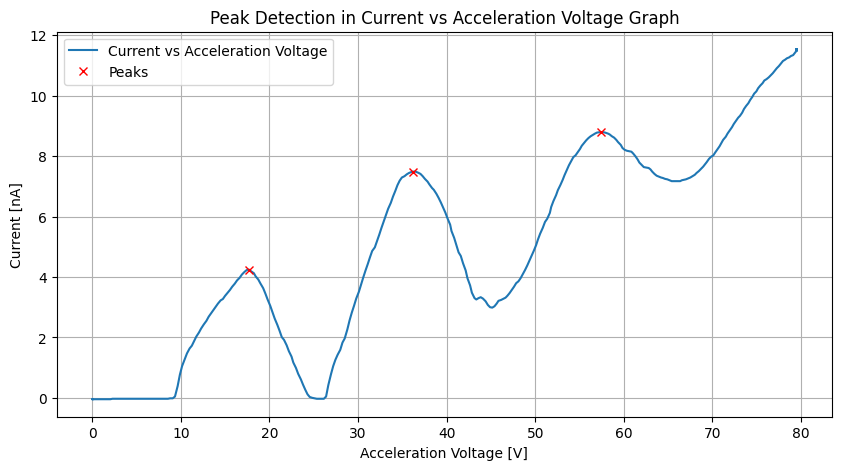

70     17.70
141    36.25
226    57.45
Name: Acceleration_U_B_V, dtype: float64

In [14]:
# Detecting peaks with a prominence factor to help distinguish actual peaks from noise
peaks, _ = find_peaks(txt_data['Current_I_A_nA'], prominence=1) # Prominence parameter may need adjustment

# Plotting the detected peaks on the graph
plt.figure(figsize=(10, 5))
plt.plot(txt_data['Acceleration_U_B_V'], txt_data['Current_I_A_nA'], label='Current vs Acceleration Voltage')
plt.plot(txt_data['Acceleration_U_B_V'][peaks], txt_data['Current_I_A_nA'][peaks], 'x', c='red', label='Peaks')
plt.title('Peak Detection in Current vs Acceleration Voltage Graph')
plt.xlabel('Acceleration Voltage [V]')
plt.ylabel('Current [nA]')
plt.legend()
plt.grid(True)
plt.show()

# Showing the peak values
peak_voltages = txt_data['Acceleration_U_B_V'][peaks]
peak_voltages

In [15]:
# Calculate the distances between consecutive peaks
peak_distances = peak_voltages.diff().dropna()  # Remove the NaN value from the first entry

# Compute the mean distance between peaks
mean_peak_distance = peak_distances.mean()

mean_peak_distance

19.875

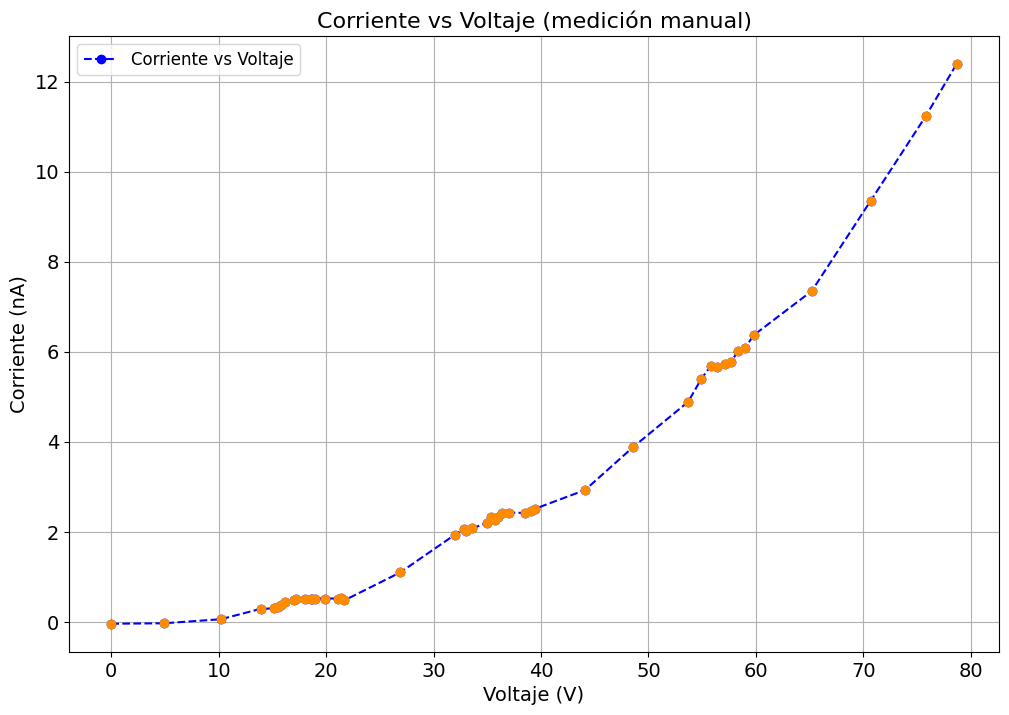

In [28]:
# Enhanced plot for the Excel data (Current vs Voltage)

plt.figure(figsize=(12, 8))
plt.plot(excel_data['V'], excel_data['I'], marker='o', linestyle='--', color='blue', label='Corriente vs Voltaje')

# Highlighting the data points with a scatter plot
plt.scatter(excel_data['V'], excel_data['I'], color='darkorange', zorder=5)

plt.title('Corriente vs Voltaje (medición manual)', fontsize=16)
plt.xlabel('Voltaje (V)', fontsize=14)
plt.ylabel('Corriente (nA)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure with a higher resolution
plt.savefig('enhanced_current_vs_voltage.png', format='png', dpi=300)
plt.show()

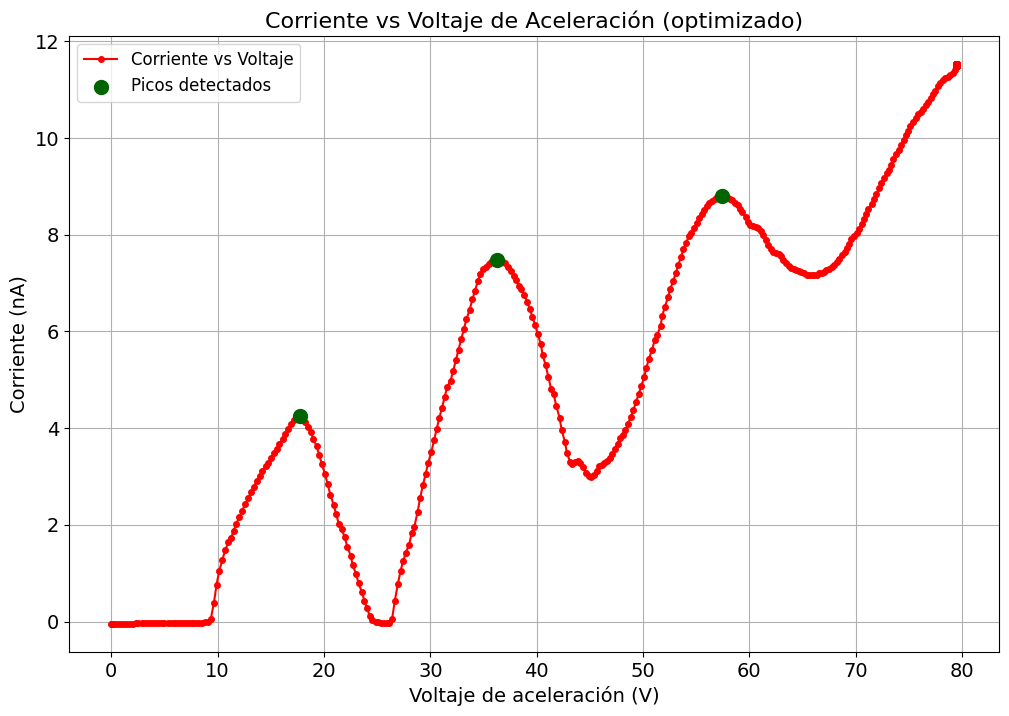

In [29]:
# Enhanced plot for the text file data (Current vs Acceleration Voltage)

plt.figure(figsize=(12, 8))
plt.plot(txt_data['Acceleration_U_B_V'], txt_data['Current_I_A_nA'], marker='o', linestyle='-', markersize=4, color='red', label='Corriente vs Voltaje')

# Highlighting the detected peaks with larger, distinctive markers
plt.scatter(txt_data['Acceleration_U_B_V'][peaks], txt_data['Current_I_A_nA'][peaks], color='darkgreen', s=100, label='Picos detectados', zorder=5)

plt.title('Corriente vs Voltaje de Aceleración (optimizado)', fontsize=16)
plt.xlabel('Voltaje de aceleración (V)', fontsize=14)
plt.ylabel('Corriente (nA)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure with a higher resolution
plt.savefig('enhanced_current_vs_acceleration_voltage_with_peaks.png', format='png', dpi=300)
plt.show()